# Влагания на думи (Word Embeddings)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

%matplotlib inline

# Работа с текст

* Embedding е често първият слой в  eдна невронна мрежа, който заменя one-hot-encoding. Предварително тренирани ембединги могат да се използват и като характеристики в традиционни алгоритми.
* Най-вече computational optimazation.
* Ембединга е речник (dictionary), който пази n-мерен вектор с тегла за всяка дума от корпуса.
* Вече всяка дума се представя не със `[0, 0, ... , 1, ... , 0]` - one-hot-encoding, а с вектор от стойности `[0.12, 0.55, -1.4, ... , 0.14]`
* При трениране на ембединги се получава латентно пространство и всяко измерение от вектора представлява скрита променлива на думите.
* Тези скрити променливи взаимодействат по интересен начин.
* Сходни думи имат сходни стойности за някои от латентните стойности.

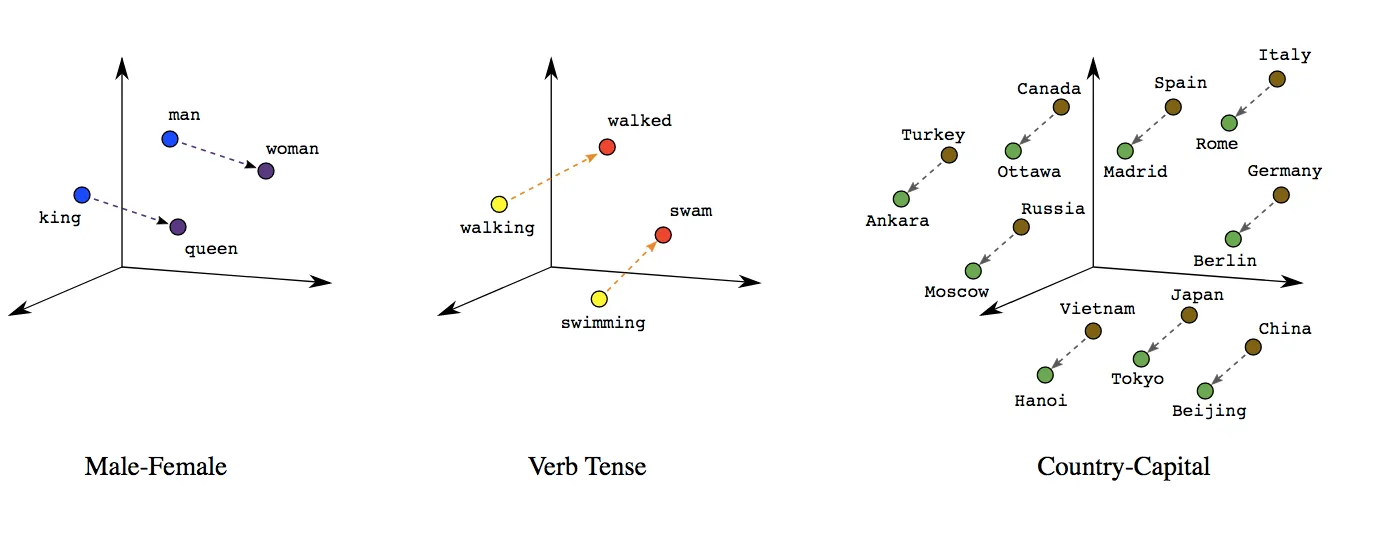

Илюстрация - от [A Guide to Word Embedding](https://towardsdatascience.com/a-guide-to-word-embeddings-8a23817ab60f).

# Видове ембединги 

Има два основни вида обучение (без учител) на тези вектори. И двата модела се опитват да моделират векторите на думите, като използват думите, които се намират близо до тях в текста.


* **Word2Vec** се опитва да моделира eдновременните срещания (co-occurance), чрез прозорци, n-grams и невронни мрежи. 
* **Glove** се оптива прави матрица на едновременните срещания и след това прави факторизиране на матрицата (matrix factorization).
* Има и други, по-съвременни методи като fastText, Flair, ELMO, BERT и други. ЕLMO и BERT са контекстно-зависими ембединги.
* При различните задачи, различни алгоритми са най-подходящи, в зависимост от количеството и качеството на данните и размера на контекста. Пример за сравнителен анализ между различните ембединги може да бъде намерен [тук, глава 5.2 Word embeddings. ](https://www.researchgate.net/profile/Melania-Berbatova/publication/353411035_Using_Structured_Information_from_Tags_for_Book_Recommendations/links/60fabe831e95fe241a818dd6/Using-Structured-Information-from-Tags-for-Book-Recommendations.pdf)
* По наблюдения, за български epru най-добри резултати се получават от [fastText векторите](https://fasttext.cc/docs/en/crawl-vectors.html), тъй като те са тренирани освен на цели думи, и на n-грами на думите. 

Имаа няколко начина за използване на ембединги:
- претренирани вектори
- трениране на собствени (отделно или като част от невронен модел)

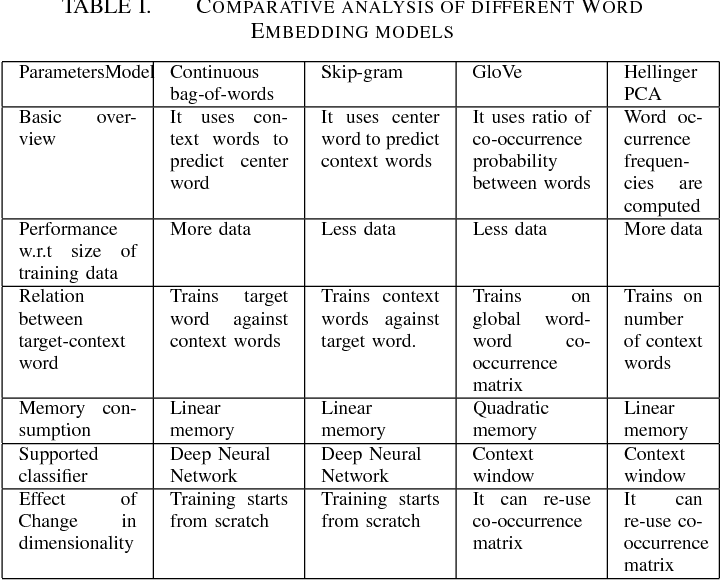

# Word2Vec

* **Continous Bag of Words Model**
* **Skip Gram Model**

![](imgs/word2vec_diagrams.png)

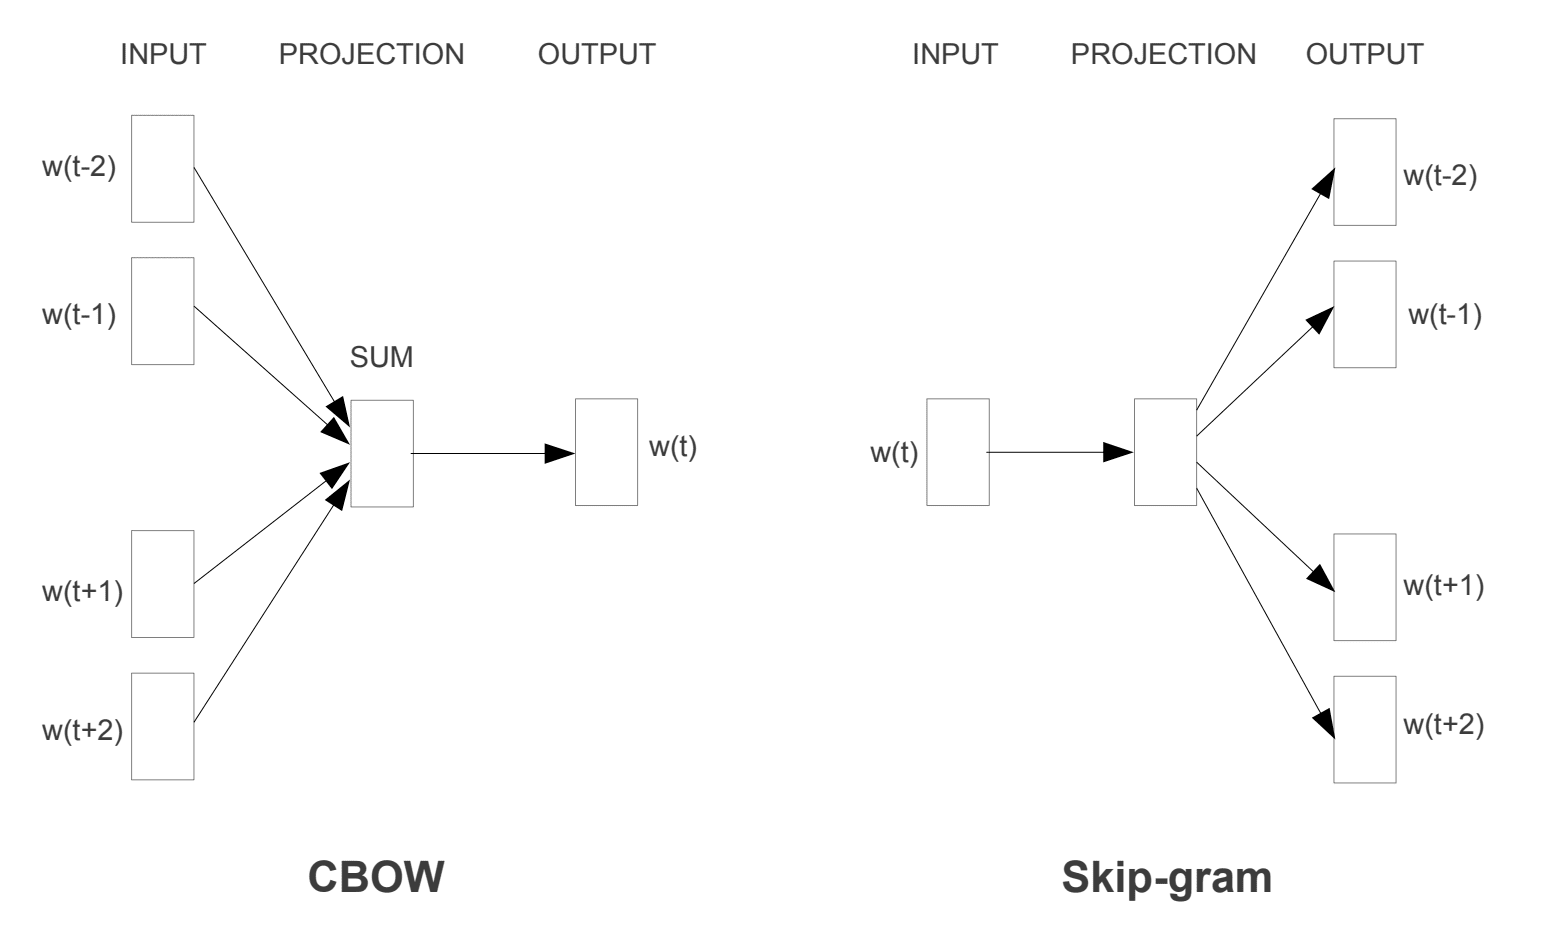

Илюстрация - от [What Are Word Embeddings for Text?](https://machinelearningmastery.com/what-are-word-embeddings/).

# GloVe: Global Vectors for Word Representation

https://nlp.stanford.edu/projects/glove/

In [5]:
t = """
Сладолед
Сладоледът представлява сладък замразен десерт.

Прави се основно от мляко, масло и захар с добавка на аромати.

Той е висококалоричен продукт, съдържащ голямо количество мазнини, захар, витамини и въглехидрати.

Съществува голямо разнообразие според вкуса, опаковката и формата на неговите видове.

Според състава си сладоледът бива:

сметанов – поне 10% масленост и 16% захар
млечен – 4% масленост и до 20% захар
плодов – без мляко, само с натурални сокове, плодове (20 – 30%) и захар (25 – 30%)
шоколадов – поне 6% шоколад (или 2,5% какао)
орехов – 6 – 10% орехи (или други ядки)
мелба – с плодове и украса (бисквити, заливки и др.)
Сладкарски изделия
""" \
+ \
"""Торта
За информацията в тази статия или раздел не са посочени източници. Въпросната информация може да е непълна, неточна или изцяло невярна.
Имайте предвид, че това може да стане причина за изтриването на цялата статия или раздел.	

Торта за рожден ден, украсена със свещи

Резен от шварцвалдска черешова торта
Тортата (от италиански Torta) е сладкарско изделие, обикновено в кръгла форма и на етажи (тестените блатове се редуват със слоеве крем) и украсено с плодове, ядки, шоколад, сметана и други, което се приготвя и поднася при по-специални случаи - рождени и имени дни, юбилеи и подобни.

По принцип тортите в кулинарията биват солени и сладки. Солените се поднасят като предястие или като част от менюто на различни приеми. Сладките торти обаче са цяло изкуство, на което се учиш цял живот, защото разнообразието им е неизчерпаемо. По консистенция тортите биват сочни (сиропирани) и сухи.

Приготвят се от различни сладкарски основи (от един или няколко различни вида). Най-често употребяваните основи са:

пандишпанови платки и блатове в най-различни вкусове и цветове - ванилия, какао, карамел, различни видове ядки или с прибавка на краве масло, прясно мляко, сметана, претърпели термична обработка плодове;
маслени сладкарски основи от класическо ронливо маслено тесто или обогатено с ядки, линцер основа, многолистна маслена основа, кейкова основа;
ядкови основи - с участие на орехови, бадемови, лешникови ядки;
белтъчни основи - леко и тежко белтъчно тесто;
медени сладкарски основи.
Друг компонент на тортите са сладкарските сиропи. Те се приготвят от захар, глюкоза, пчелен мед, вода, хранителна киселина, оцветители и овкусители. Понякога захарта се карамелизира и се получава карамелов сироп, а с прибавка на какао и масло се получава какаов сироп. Киселината служи за инверсия на сиропа с цел предпазване от изкристализиране на захарта от сиропа.

Следващия компонент от приготвянето на торти е пълнежът. За пълнеж се използват различни сладкарски кремове - маслен, шоколадов, сметанов и комбинации между тях. Понякога се добавят и натрошени ядки, шоколад, крокант, желиращи вещества, ликьори, конфитюри, яйца, есенции, пресни плодове.

Операцията по сиропиране на сладкарските основи се нарича трампиране, а съединяването им с крем - зафилване. След зафилването е необходимо време за охлаждане и стягане на основите. Следащата операция е гарниране с крем, глазури, поръски, панировки, фарситури от различен произход.

Последна операция е украсяване с художествена цел от крем, глазури, поръски и плодове.

Готовите торти се съхраняват при хладилни условия или в сухи и тъмни складове при подходяща температура и ниска относителна влажност на въздуха.

Категории: Сладкарски изделия Десерти
"""

In [7]:
sentences = t.replace("\n",".").split(".")
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
one_hot_sentence = cv.fit_transform(sentences).todense()
print(len(cv.vocabulary_))
print(one_hot_sentence.shape)

286
(76, 286)


In [8]:
co_occurance = one_hot_sentence.T.dot(one_hot_sentence)

In [9]:
df = pd.DataFrame(co_occurance, index=cv.vocabulary_, columns=cv.vocabulary_)
df

,сладолед,сладоледът,представлява,сладък,замразен,десерт,прави,се,основно,от,...,тъмни,складове,подходяща,температура,ниска,относителна,влажност,въздуха,категории,десерти
сладолед,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
сладоледът,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
представлява,0,0,2,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
сладък,0,0,1,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
замразен,0,0,2,2,4,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
десерт,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
прави,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
се,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
основно,0,0,1,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
от,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ids = ['сладолед', 'торта', 'десерт']
small = df[ids]
small[(small.T != 0).any()].sort_values(ids, ascending=False)

,сладолед,торта,десерт
сладолед,2,0,0
плодов,1,0,1
въздуха,1,0,1
сладоледът,1,0,0
какао,1,0,0
изделия,1,0,0
обикновено,1,0,0
част,1,0,0
менюто,1,0,0
един,1,0,0


* Няма да ни стигне времето да имплементираме моделите,
* Но ще покажем как да ги използваме на готово.

# gensim

* Библиотека за работа с текст.
* https://radimrehurek.com/gensim/install.html

In [2]:
!pip install gensim

# Сваляне на претренирани вектори

* Google word2vec от [тук](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing) (1.5GB)
* Stanford Glove от [тук](https://nlp.stanford.edu/projects/glove/)  (800MB - 2GB)

или `wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"`

# Зареждане на вектори от Google Word2Vec

In [6]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

In [13]:
# най-близки думи
model.most_similar(positive=['milk'], topn=10)

[('dairy', 0.732360303401947),
 ('cow_milk', 0.6860158443450928),
 ('milk_powder', 0.6646485924720764),
 ('camels_Nancy_Riegler', 0.6561243534088135),
 ('powdered_milk', 0.6497933268547058),
 ('raw_milk', 0.6309322118759155),
 ('goat_milk', 0.6260650157928467),
 ('apple_juice', 0.6173229217529297),
 ('whey', 0.6159118413925171),
 ('chocolate_caramel_mousse', 0.6145174503326416)]

In [15]:
model.most_similar(positive=['panda'])

[('giant_panda', 0.8250844478607178),
 ('pandas', 0.791919469833374),
 ('giant_pandas', 0.6932857036590576),
 ('panda_cub', 0.6871635317802429),
 ('Giant_panda', 0.6341897249221802),
 ('giant_panda_cub', 0.6139722466468811),
 ('orangutan', 0.6027069091796875),
 ('panda_cubs', 0.5879790782928467),
 ('Giant_Panda', 0.5849473476409912),
 ('captive_pandas', 0.583149790763855)]

# Аритментика с думи

In [16]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.7118192315101624)]

In [43]:
model.most_similar(positive=['grandfather', 'woman'], negative=['man'], topn=1)

[('grandmother', 0.7433432936668396)]

In [53]:
model.most_similar(positive=['grandfather', 'young', 'man'], negative=['old'], topn=1)

[('father', 0.6096605062484741)]

In [50]:
model.most_similar(positive=['paris', 'germany'], negative=['france'], topn=1)

[('berlin', 0.48413652181625366)]

# Можем да търсим и кое е излишното:


In [57]:
model.doesnt_match(["icecream", "cake", "chocolate", "whiskey"])

'whiskey'

In [62]:
model.doesnt_match(["vegetable", "bicycle", "motorboat", "car", "plane"])

'vegetable'

In [73]:
model.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

# Зареждане на модели от Stanford Glove

In [106]:
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_input_file = 'glove.txt'
# word2vec_output_file = 'word2vec.txt'
# glove2word2vec(glove_input_file, word2vec_output_file)

# След което зареждате, както Google Word2Vec

# Туториал за tensorflow:
https://www.tensorflow.org/tutorials/word2vec

# Трениране на word2vec със собствен корпус

# Изтегляне на wiki корпус
`wget -c ''bgwiki-latest-pages-articles-multistream.xml.bz2'`

от https://dumps.wikimedia.org/bgwiki/

~300MB

In [3]:
from gensim.corpora.wikicorpus import WikiCorpus
from gensim.models.word2vec import Word2Vec

In [ ]:
wiki = WikiCorpus('bgwiki-latest-pages-articles-multistream.xml.bz2', lemmatize=False, dictionary={})
sentences = list(wiki.get_texts())

In [100]:
print(len(sentences))
print(sentences[0])

175389
['папа', 'григорий', 'xiii', 'вечният', 'григориански', 'календар', 'от', 'октомври', 'йезуитът', 'христофор', 'клавий', 'важен', 'член', 'от', 'реформната', 'комисия', 'изчисление', 'по', 'костите', 'на', 'ръцете', 'пфениг', 'пощенска', 'марка', 'на', 'германската', 'поща', 'за', 'годишнината', 'на', 'григорианския', 'календар', 'григорианският', 'календар', 'понякога', 'наричан', 'грегориански', 'календар', 'нов', 'стил', 'съвременният', 'международно', 'признат', 'светски', 'календар', 'на', 'който', 'се', 'основава', 'международният', 'стандарт', 'iso', 'григорианският', 'календар', 'въведен', 'употреба', 'на', 'октомври', 'съответствие', 'була', 'от', 'февруари', 'на', 'папа', 'григорий', 'xiii', 'чието', 'име', 'носи', 'днес', 'той', 'поправя', 'древноримския', 'юлиански', 'календар', 'като', 'него', 'са', 'нанесени', 'някои', 'корекции', 'за', 'да', 'се', 'отчете', 'по', 'точно', 'дължината', 'на', 'тропическата', 'година', 'юлианския', 'календар', 'се', 'приема', 'че', '

In [103]:
%time word2vec = Word2Vec(sentences, size=200, window=10, min_count=5, workers=8)

CPU times: user 25min 6s, sys: 0 ns, total: 25min 6s
Wall time: 4min 45s


In [4]:
# Запазване и зареждане на модела

# word2vec.save('bgwiki_word2vec.pkl')
# word2vec = Word2Vec.load("bgwiki_word2vec.pkl")

In [5]:
word2vec.wv.most_similar(positive=['жена', 'цар'], negative=['мъж'])

[('царица', 0.5910613536834717),
 ('съпруга', 0.5418516397476196),
 ('шишман', 0.5248759388923645),
 ('царя', 0.5007351040840149),
 ('срацимир', 0.4924395978450775),
 ('подялба', 0.45563459396362305),
 ('княз', 0.4555596709251404),
 ('деспот', 0.4535294771194458),
 ('царят', 0.44551363587379456),
 ('тертер', 0.4402218461036682)]

In [122]:
word2vec.wv.most_similar(positive=['лондон', 'франция'], negative=['англия'])

[('париж', 0.7006015777587891),
 ('женева', 0.5756803154945374),
 ('версай', 0.5394696593284607),
 ('ентернасионал', 0.5204002857208252),
 ('парижката', 0.5188260078430176),
 ('брюксел', 0.5180582404136658),
 ('виена', 0.5037818551063538),
 ('фонтенбло', 0.5002224445343018),
 ('лион', 0.4843534231185913),
 ('парижкото', 0.47921890020370483)]

# И примера, до който искахме да стигнем през цялото време!

In [107]:
word2vec.wv.most_similar(positive=['ракия', 'жена'], negative=['мъж'])

[('боза', 0.6232482194900513),
 ('рецепта', 0.612866997718811),
 ('напитка', 0.6056855916976929),
 ('сливова', 0.5827717185020447),
 ('супа', 0.5814237594604492),
 ('чорба', 0.5782036781311035),
 ('салата', 0.5657293796539307),
 ('паста', 0.5535566806793213),
 ('приготвена', 0.5527642965316772),
 ('торта', 0.5489768981933594)]

# Document Embedding

* Ако знаем колко думи ще има в докимента или текста: Слепваме векторите за всяка дума.
* Ако не знаем - можем да вземем сумата от векторите на всичките думи в изречениетио.
* Можем да направим avg или да ползваме IDF.

* По-напредничивите техники използват CNN и RNN.